In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [9]:
# Pfad zum Datenordner
data_dir = 'data'
train_dir = os.path.join(data_dir, 'Train')
test_dir = os.path.join(data_dir, 'Test')
meta_dir = os.path.join(data_dir, 'Meta')

# CSV-Dateien einlesen
train_df = pd.read_csv('C:/AP/Studium/DataExploration/Data-Exploration/data/train.csv')
test_df = pd.read_csv('C:/AP/Studium/DataExploration/Data-Exploration/data/test.csv')

# Bildgröße
image_size = (32, 32)

# Funktion zum Laden der Bilder
def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, image_size)
    img = img / 255.0  # Normalisierung der Pixelwerte auf den Bereich [0, 1]
    return img

# Funktion zum Laden der Trainingsdaten
def load_train_data(df):
    images = []
    labels = []
    for i, row in df.iterrows():
        image_path = os.path.join(row['Path'])
        image = load_image(image_path)
        label = row['ClassId']
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

# Funktion zum Laden der Testdaten
def load_test_data(df):
    images = []
    labels = []
    for i, row in df.iterrows():
        image_path = os.path.join(row['Path'])
        image = load_image(image_path)
        label = row['ClassId']
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

# Trainingsdaten laden
train_images, train_labels = load_train_data(train_df)

# Testdaten laden
test_images, test_labels = load_test_data(test_df)

# Anzahl der Klassen
num_classes = len(np.unique(train_labels))

# Modell definieren
model = tf.keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Modell kompilieren
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Modell trainieren
model.fit(train_images, train_labels, epochs=10, batch_size=32)

# Modell auf Testdaten evaluieren
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

# Vorhersagen für Testdaten
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Vergleich der Vorhersagen mit den wahren Labels
correct_predictions = np.sum(predicted_labels == test_labels)
total_predictions = len(test_labels)
accuracy = correct_predictions / total_predictions
print(f'Accuracy on test data: {accuracy}')

#save model
model.save('model.test5')

NameError: name 'pd' is not defined

In [19]:
from PIL import Image
import os

def reduce_image_size(input_image_path, target_file_size):
    image = Image.open(input_image_path)

    # Berechne das Verhältnis, um die Zielgröße zu erreichen
    width, height = image.size
    aspect_ratio = width / height
    target_width = int((target_file_size * 1024) ** 0.5 * aspect_ratio)
    target_height = int(target_width / aspect_ratio)

    # Skaliere das Bild mit der berechneten Zielgröße
    resized_image = image.resize((50, 50), Image.ANTIALIAS)

    # Schließe das geöffnete Bild
    image.close()

    # Gib das skalierte Bild zurück
    return resized_image

# Beispielaufruf
input_image_path = r'C:\AP\Studium\DataExploration\Data-Exploration\data\randomPic\120.jpg'  # Pfad zum Eingangsbild
target_file_size = 5  # Zielgröße in KB

resized_image = reduce_image_size(input_image_path, target_file_size)

# Speichere das skalierte Bild
resized_image_path = r'C:\AP\Studium\DataExploration\Data-Exploration\data\randomPic\skaliertes_bild.jpg'
resized_image.save(resized_image_path, optimize=True, quality=95)

C:\Users\alexp\AppData\Local\Temp\ipykernel_11608\1627786282.py:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize((50, 50), Image.ANTIALIAS)


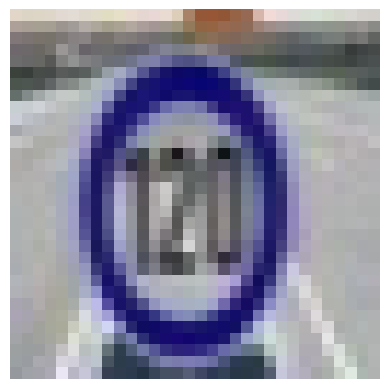

1/1 [==============================] - 0s 111ms/step
Speed limit (30km/h)
Predicted label: 1


In [21]:
import numpy as np
import cv2
from keras.models import load_model
import matplotlib.pyplot as plt

# Pfad zum Testbild
test_image_path = resized_image_path
#test_image_path = r'C:\AP\Studium\DataExploration\Data-Exploration\data\Test\00200.png'

# Bildgröße
image_size = (32, 32)

# Funktion zum Laden des Testbildes
def load_test_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, image_size)
    img = img / 255.0  # Normalisierung der Pixelwerte auf den Bereich [0, 1]
    return img

# Modell laden
model = load_model('traffic-sign-detection/test6_model.h5')

# Laden und Verarbeiten des Testbildes
test_image = load_test_image(test_image_path)
test_image = np.expand_dims(test_image, axis=0)
#anzeigen des tes_image
plt.imshow(test_image[0])
plt.axis('off')
plt.show()

# Vorhersage für das Testbild
prediction = model.predict(test_image)
predicted_label = np.argmax(prediction)

if predicted_label==0:
    print('Speed limit (20km/h)') #print the content
elif predicted_label==1:
    print('Speed limit (30km/h)') #print the content
elif predicted_label==2:
    print('Speed limit (50km/h)') #print the content
elif predicted_label==3:
    print(' Speed limit (60km/h)') #print the content
elif predicted_label==4:
    print('Speed limit (70km/h)') #print the content
elif predicted_label==5:
    print('Speed limit (80km/h)') #print the content
elif predicted_label==6:
    print('End of speed limit (80km/h)') 
elif predicted_label==7:
    print('Speed limit (100km/h)')
elif predicted_label==8:
    print('Speed limit (120km/h)') 
elif predicted_label==9:
    print('No passing')
elif predicted_label==10:
    print('No passing veh over 3.5 tons')
elif predicted_label==11:
    print('Right-of-way at intersection')
elif predicted_label==12:
    print('Priority road')
elif predicted_label==13:
    print('Yield')
elif predicted_label==14:
    print('Stop')
elif predicted_label==15:
    print('No vehicles')
elif predicted_label==16:
    print('Veh > 3.5 tons prohibited')  
elif predicted_label==17:
    print('No entry')
elif predicted_label==18:
    print('General caution')
elif predicted_label==19:
    print('Dangerous curve left')
elif predicted_label==20:
    print('Dangerous curve right')
elif predicted_label==21:
    print('Double curve')
elif predicted_label==22:
    print('Bumpy road')
elif predicted_label==23:
    print('Slippery road')
elif predicted_label==24:   
    print('Road narrows on the right')
elif predicted_label==25:
    print('Road work')
elif predicted_label==26:
    print('Traffic signals')
elif predicted_label==27:
    print('Pedestrians')
elif predicted_label==28:
    print('Children crossing')
elif predicted_label==29:
    print('Bicycles crossing')
elif predicted_label==30:
    print('Beware of ice/snow')
elif predicted_label==31:
    print('Wild animals crossing')
elif predicted_label==32:
    print('End speed + passing limits')
elif predicted_label==33:
    print('Turn right ahead')
elif predicted_label==34:
    print('Turn left ahead')
elif predicted_label==35:
    print('Ahead only')
elif predicted_label==36:
    print('Go straight or right')   
elif predicted_label==37:
    print('Go straight or left')
elif predicted_label==38:    
    print('Keep right')
elif predicted_label==39:
    print('Keep left')
elif predicted_label==40:
    print('Roundabout mandatory')
elif predicted_label==41:
    print('End of no passing')
else:
    print('End no passing veh > 3.5 tons')

print(f'Predicted label: {predicted_label}')



In [10]:
from keras.models import load_model
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
from keras.preprocessing import image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
import random
import keras.utils

model = load_model('traffic-sign-detection/test6_model.h5')

path = r'C:\AP\Studium\DataExploration\Data-Exploration\data\randomPic\100_2.jpg'

img = Image.open(path).convert('RGB')  # load the image using PIL
img = img.resize((32, 32))  # resize the image
x = np.array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

value = classes = np.argmax(model.predict(images, batch_size=32), axis=-1)  # predict the label for the image

if classes[0]==0:
    print('Speed limit (20km/h)') #print the content

elif classes[0]==1:
    print('Speed limit (30km/h)') #print the content

elif classes[0]==2:
    print('Speed limit (50km/h)') #print the content

elif classes[0]==3:
    print(' Speed limit (60km/h)') #print the content

elif classes[0]==4:
    print('Speed limit (70km/h)') #print the content

elif classes[0]==5:
    print('Speed limit (80km/h)') #print the content

elif classes[0]==6:
    print('End of speed limit (80km/h)') #print the content

elif classes[0]==7:
    print('Speed limit (100km/h)') #print the content

elif classes[0]==8:
    print('Speed limit (120km/h)') #print the content

elif classes[0]==9:
    print('No passing') #print the content
    
elif classes[0]==10:
    print('No passing veh over 3.5 tons') #print the content 
    
elif classes[0]==11:
    print(', Right-of-way at intersection') #print the content
    
elif classes[0]==12:
    print('Priority road') #print the content
    
elif classes[0]==13:
    print('Yield') #print the content       
elif classes[0]==14:
    print('Stop') #print the content       
    
elif classes[0]==15:
    print('No vehicles') #print the content
            
elif classes[0]==16:
    print('Veh > 3.5 tons prohibited') #print the content       
    
elif classes[0]==17:
    print('No entry') #print the content        
                    
elif classes[0]==18:
    print('General caution') #print the content       
            
elif classes[0]==19:
    print('Dangerous curve left') #print the content        
    
elif classes[0]==20:
    print('Dangerous curve right') #print the content        
    
elif classes[0]==21:
    print('Double curve') #print the content       
    
elif classes[0]==22:
    print('Bumpy road') #print the content        
            
elif classes[0]==23:
    print('Slippery road') #print the content        
    
elif classes[0]==24:
    print('Road narrows on the right') #print the content               
    
elif classes[0]==25:
    print('Road work') #print the content        
    
elif classes[0]==26:
    print('Traffic signals') #print the content
    
elif classes[0]==27:
    print('Pedestrians') #print the content       
            
elif classes[0]==28:
    print('Children crossing') #print the content
    
elif classes[0]==29:
    print( 'Bicycles crossing') #print the content
            
elif classes[0]==30:
    print('Beware of ice/snow') #print the content        
    
elif classes[0]==31:
    print('Wild animals crossing') #print the content        
            
elif classes[0]==32:
    print('End speed + passing limits') #print the content        
    
elif classes[0]==33:
    print('Turn right ahead') #print the content
    
elif classes[0]==34:
    print('Turn left ahead') #print the content        
    
elif classes[0]==35:
    print('Ahead only') #print the content        
    
elif classes[0]==36:
    print('Go straight or right') #print the content
    
elif classes[0]==37:
    print('Go straight or left') #print the content        
    
elif classes[0]==38:
    print('Keep right') #print the content
    
elif classes[0]==39:
    print('Keep left') #print the content       
    
elif classes[0]==40:
    print('Roundabout mandatory') #print the content

elif classes[0]==41:
    print('End of no passing') #print the content        
    
else:
    print('End no passing veh > 3.5 tons') #print the content

1/1 [==============================] - 0s 50ms/step
Yield
